## Script to ananlyse and plot otput files from fluent ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
workingDir=r"C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4IR9-Solartron\WP3-local\03_Results"
testCase=r"testCase_02"
#caseName="report-def-0-rfile.out"
caseName="report-def-0-rfile_1_k-eps.out"
case=os.path.join(workingDir,testCase,caseName)
print(case)

C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4IR9-Solartron\WP3-local\03_Results\testCase_02\report-def-0-rfile_1_k-eps.out


In [3]:
data=pd.read_csv(case, sep=' ', skiprows=3, names=['iter','pt1','pt2','pt3','pt4','pt5','pt6','pt7','pt8'])

In [4]:
pressureTap=(['iter','pt1','pt2','pt3','pt4','pt5','pt6','pt7','pt8'])

In [5]:
for nome in pressureTap[1:]:
    print(data[nome].mean())

6400214.5471582785
6334001.9785383
6387452.131325523
6402630.3687236225
6366560.89457795
6366890.033801862
6385749.656391228
6387544.568906424


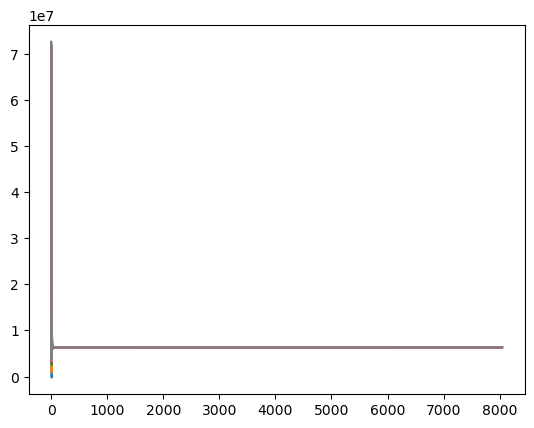

In [6]:
for nome in pressureTap[1:]:
    data[nome].plot()

# Extract sub set #
To extract a subset of a Pandas DataFrame based on index positions, you can use the `iloc` method. Here is an example:

```python
df_subset = df.iloc[i:j+1, :]
```

Here, `df` is the original DataFrame, `i` is the starting index position, and `j` is the ending index position. The `+1` is added to include the last index position in the subset. The second argument `:` indicates that we want to include all columns in the subset.

For example, if you have a DataFrame with 10 rows and 5 columns and you want to extract rows 3 to 7 (inclusive), you can use the following code:

```python
df_subset = df.iloc[3:8, :]
```

To extract a subset of a Pandas DataFrame based on index positions and specific columns, you can use the `iloc` method. Here is an example:

```python
df_subset = df.iloc[i:j+1, [column_index1, column_index2, ...]]
```

Here, `df` is the original DataFrame, `i` is the starting index position, and `j` is the ending index position. The `+1` is added to include the last index position in the subset. The second argument `[column_index1, column_index2, ...]` indicates that we want to include only specific columns in the subset. Replace `column_index1`, `column_index2`, etc. with the index positions of the columns you want to include.

For example, if you have a DataFrame with 10 rows and 5 columns and you want to extract rows 3 to 7 (inclusive) and columns 1, 3, and 4, you can use the following code:

```python
df_subset = df.iloc[3:8, [1, 3, 4]]
```

In [7]:
 dfsub=data.iloc[2000:4000, :]

In [8]:
for nome in pressureTap[1:]:
    print(dfsub[nome].mean())

6375757.046347
6310336.0922966115
6356324.020056548
6377536.462594222
6343269.912101118
6342444.965356642
6364931.391939904
6365732.533344702


# Calculations using numpy #

Converting data to numpy ( data are easier to manipulate compared to pandas) and 
evaluation of dp 

The approach at the moment is similar to the previous mixer

In [9]:
dpsub=dfsub.to_numpy()

In [10]:
dp=np.zeros_like(dpsub)

In [11]:
dp[:,0]=(dpsub[:,1]-dpsub[:,2])/100

In [12]:
dp[:,1]=(dpsub[:,1]-dpsub[:,3])/100

In [13]:
dp[:,2]=(dpsub[:,4]-dpsub[:,5])/100

In [14]:
dp[:,3]=(dpsub[:,4]-dpsub[:,6])/100

In [15]:
dp[:,4]=(dpsub[:,7]-dpsub[:,8])/100

In [16]:
x=np.arange(0,len(dp))

In [17]:
plt.ioff()
#plt.ion()

In [18]:
fig, ax = plt.subplots(5, sharex=True)
x=np.arange(0,len(dp))
for j in [0,1,2,3,4]:
#for j in [0]:
    ax[j].plot(x,dp[:,j], '--', label='line plot')
    y_avg =np.full(np.shape(dp)[0],np.average(dp[:,j]))
    avg=np.average(dp[:,j])
    y1=np.full(np.shape(dp)[0],np.std(dp[:,j]))
 #   y2=-(np.full(np.shape(dp)[0],np.std(dp[:,j])))
    ax[j].plot(x,y_avg,  color='red', lw=2, ls='--', label="average value")
    ax[j].fill_between(x,(y_avg-y1), (y_avg+y1), color='green', alpha=.5, linewidth=0)
    ax[j].text(0,0.7, 'AVG= %5.2f' %(avg), transform=ax[j].transAxes)
    #ax[j].legend(loc=1)

#ax[1].boxplot(dp['dp'])


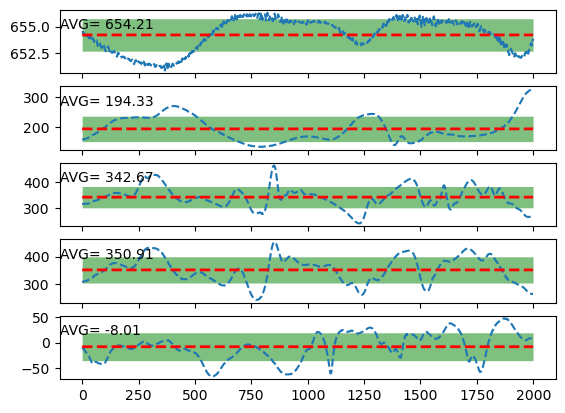

In [19]:
plt.show()